# Feed-Forward Neural Network

In this practical exercise the goal is to implement a Feed-Forward Neural Network (ffNN), instead of the common model of Convolutional Neural Network (CNN), for solving two image classification problems: [German Traffic Sign Recognition Benchmark](https://benchmark.ini.rub.de/gtsrb_news.html) and [Cifar-100](https://web.stanford.edu/~hastie/CASI_files/DATA/cifar-100.html).

## Implementation

The base implementation in Python with the tensorflow library is given and the aim is to decide on the following factors:

- Number of layers and number of units in each layer.
- Optimization parameters and algorithms to train the net.
- When to stop training according to the evolution of training during the optimization.
- Regularization.

The preprocessing performed consists of the following steps:

- Normalize the images between [0 , 1].
- Convert class vector to binary class matrix.
- Convert pictures to grayscale.
- Gaussian blur.

## Results

The best configuration found for the [German Traffic Sign Recognition Benchmark](https://benchmark.ini.rub.de/gtsrb_news.html) achieved a 92.5\% of training and 84.13\% in validation. The architecture consisted of:

- Three layers with decreasing number of nodes.
- Two layer with decreasing number of nodes 300-150 neurons.
- Two layer with constant number of nodes.

The best configuration found for the [Cifar-100](https://web.stanford.edu/~hastie/CASI_files/DATA/cifar-100.html) achieved a 33.16\% of training and 27.88\% in validation. The architecture consisted of:

- Three layers with decreasing number of nodes 1024 - 768 - 512 neurons.
- Two layers with decreasing number of nodes.
- Two layers with constant number of nodes.

## Authors

- Student Name 1: Stefano Baggetto
- Student Name 2: Giorgio Segalla
- Student Name 3: Angel Igareta ([angel@igareta.com](angel@igareta.com))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Hyper parameters

In [ ]:
from tensorboard.plugins.hparams import api as hp

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([256]))
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.15]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['nadam']))
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.Discrete([5e-05]))

hp.hparams_config(
  hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER, HP_LEARNING_RATE],
  metrics=[hp.Metric('accuracy', display_name='Accuracy')],
)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers

# 0.89
def get_best_model(input_shape):
  mlp = Sequential([
    Flatten(input_shape=input_shape),
    Activation('relu'),
    Dropout(0.15),
    Dense(500, activation="relu"),
    Dropout(0.15),
    Dense(250, activation="relu"),
    Dropout(0.15),
    Dense(num_classes, activation="softmax")
  ])
  opt = optimizers.Adam(lr=0.00005, beta_1=0.9, beta_2=0.999)
  mlp.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return mlp

def get_model(hparams, input_shape):
  mlp = Sequential([
    Flatten(input_shape=input_shape),
    Activation('relu'),
    Dropout(0.1),
    Dense(hparams[HP_NUM_UNITS] * 2, activation="relu"),
    Dropout(0.1),
    Dense(hparams[HP_NUM_UNITS], activation="relu"),
    Dropout(0.1),
    Dense(hparams[HP_NUM_UNITS], activation="relu"),
    Dropout(0.1),
    Dense(num_classes, activation="softmax")
  ])

  # By default
  opt = optimizers.Nadam(lr=hparams[HP_LEARNING_RATE], beta_1=0.9, beta_2=0.999)

  if (hparams[HP_OPTIMIZER] == 'adam'):
    opt = optimizers.Adam(lr=hparams[HP_LEARNING_RATE], beta_1=0.9, beta_2=0.999)
  elif (hparams[HP_OPTIMIZER] == 'sgd'):
    opt = optimizers.SGD(lr=hparams[HP_LEARNING_RATE], decay=1e-6, momentum=0.9, nesterov=True)
    
  mlp.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return mlp

# mlp.summary()

In [ ]:
def visualize_accuracy(data):
  # Visualize model
  plt.plot(data.history['acc'])
  plt.plot(data.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
def visualize_loss(data): 
  plt.plot(data.history['loss'])
  plt.plot(data.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

## German Traffic Sign Benchmark

In [ ]:
#!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate "https://docs.google.com/uc?export=download&id=1De6T4b6mtFQALtuyT05zxGkS1YHKXG01" -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1De6T4b6mtFQALtuyT05zxGkS1YHKXG01" -O FullIJCNN2013.zip && rm -rf /tmp/cookies.txt
!unzip "/content/drive/My Drive/Colab Notebooks/DeepLearning_Assignment2/FullIJCNN2013.zip"

Archive:  /content/drive/My Drive/Colab Notebooks/DeepLearning_Assignment2/FullIJCNN2013.zip
   creating: FullIJCNN2013/
   creating: FullIJCNN2013/00/
  inflating: FullIJCNN2013/00000.ppm  
  inflating: FullIJCNN2013/00001.ppm  
  inflating: FullIJCNN2013/00002.ppm  
  inflating: FullIJCNN2013/00003.ppm  
  inflating: FullIJCNN2013/00004.ppm  
  inflating: FullIJCNN2013/00005.ppm  
  inflating: FullIJCNN2013/00006.ppm  
  inflating: FullIJCNN2013/00007.ppm  
  inflating: FullIJCNN2013/00008.ppm  
  inflating: FullIJCNN2013/00009.ppm  
  inflating: FullIJCNN2013/00010.ppm  
  inflating: FullIJCNN2013/00011.ppm  
  inflating: FullIJCNN2013/00012.ppm  
  inflating: FullIJCNN2013/00013.ppm  
  inflating: FullIJCNN2013/00014.ppm  
  inflating: FullIJCNN2013/00015.ppm  
  inflating: FullIJCNN2013/00016.ppm  
  inflating: FullIJCNN2013/00017.ppm  
  inflating: FullIJCNN2013/00018.ppm  
  inflating: FullIJCNN2013/00019.ppm  
  inflating: FullIJCNN2013/00020.ppm  
  inflating: FullIJCNN2013/00

In [ ]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (224, 224)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [ ]:
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('FullIJCNN2013', range(0,600), range(0,852))
test_images, test_files, test_signs, test_bboxes, test_labels = readImages('FullIJCNN2013', range(600,900), range(852,1213))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


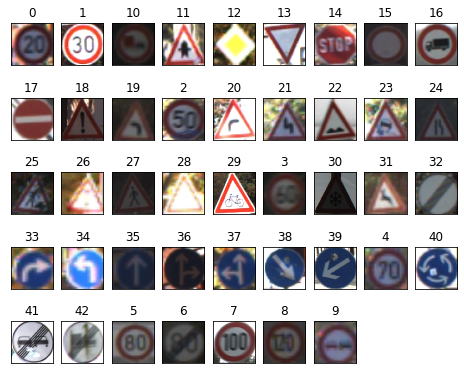

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline 

datagen = ImageDataGenerator(zca_whitening=True)

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    # img = cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(train_signs[indices[0]], cv2.COLOR_BGR2RGB)
    plt.imshow(img)

plt.show()

In [ ]:
!pip install -I keras
from sklearn.utils import shuffle
train_files, train_signs, train_bboxes, train_labels = shuffle(train_files, train_signs, train_bboxes, train_labels)
# plt.imshow(cv2.cvtColor(train_images.get(train_files[0])[0], cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(train_signs[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(train_bboxes[0])
# print(train_labels[0])

# Data pre-processing
tr_signs = np.array(train_signs)[0:600]
tr_labels = np.array(train_labels)[0:600]
va_signs = np.array(train_signs)[600:852]
va_labels = np.array(train_labels)[600:852]
te_signs = np.array(test_signs)
te_labels = np.array(test_labels)

# Normalize the images to be values in range [0, 1]
tr_signs = tr_signs.astype('float32')
va_signs = va_signs.astype('float32')
te_signs = te_signs.astype('float32')
tr_signs /= 255.0
va_signs /= 255.0
te_signs /= 255.0

from keras.utils import np_utils
# Converts a class vector (integers) to binary class matrix
tr_labels = np_utils.to_categorical(tr_labels, num_classes)
va_labels = np_utils.to_categorical(va_labels, num_classes)
te_labels = np_utils.to_categorical(te_labels, num_classes)

  Using cached https://files.pythonhosted.org/packages/ad/fd/6bfe87920d7f4fd475acd28500a42482b6b84479832bdc0fe9e589a60ceb/Keras-2.3.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/06/cafdd44889200e5438b897388f3075b52a8ef01f28a17366d91de0fa2d05/h5py-2.10.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl
Processing /root/.cache/pip/wheels/e4/76/4d/a95b8dd7b452b69e8ed4f68b69e1b55e12c9c9624dd962b191/PyYAML-5.3-cp36-cp36m-linux_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dc

In [ ]:
from time import time

def train_first_model(mlp, epochs = 150, verbose = 0):
  data = mlp.fit(tr_signs, tr_labels, batch_size=128, epochs=epochs, verbose=verbose, shuffle=True, 
                validation_data=(va_signs, va_labels))

  start = time()
  loss, acc = mlp.evaluate(te_signs, te_labels, verbose=0)
  end = time()
  print('ffNN took ' + str(end - start) + ' seconds')
  print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

  return data

In [ ]:
def run_first(run_dir, hparams, input_shape):
    hp.hparams(hparams)  # record the values used in this trial
    mlp = get_model(hparams, input_shape=input_shape)
    data = train_first_model(mlp)
    visualize_accuracy(data)
    visualize_loss(data)
    # tf.summary.scalar('accuracy', accuracy, step=1)

--- Starting trial: run-0
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.15, 'learning_rate': 5e-05}



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








ffNN took 0.2463228702545166 seconds
Test loss: 0.6217269075214037 - Accuracy: 0.8808864267579076


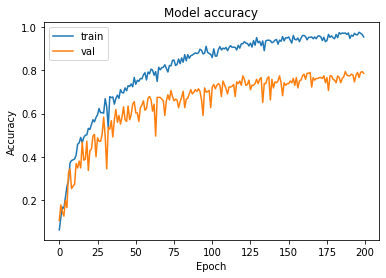

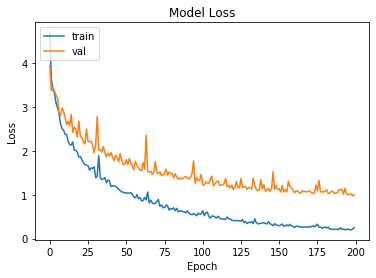

--- Starting trial: run-1
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.2, 'learning_rate': 5e-05}
ffNN took 0.24656057357788086 seconds
Test loss: 0.6403389660605433 - Accuracy: 0.8531855957329768


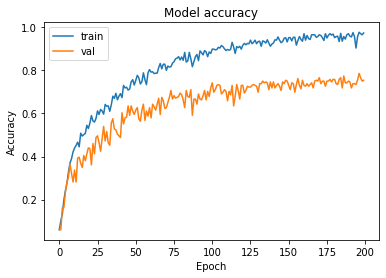

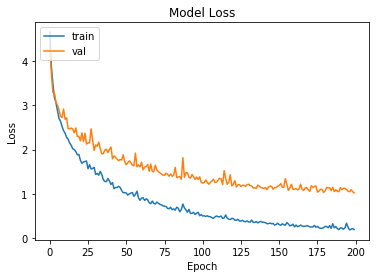

--- Starting trial: run-2
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.15, 'learning_rate': 5e-05}
ffNN took 0.26023411750793457 seconds
Test loss: 1.2473015210635114 - Accuracy: 0.7257617731834052


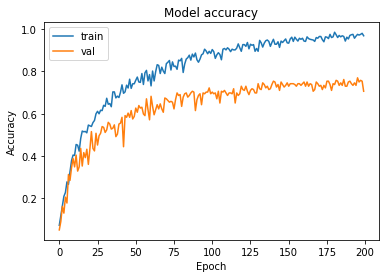

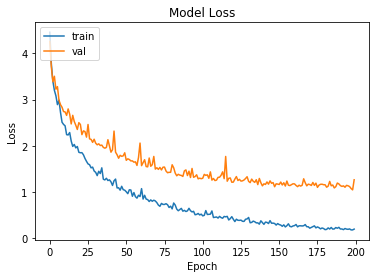

--- Starting trial: run-3
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.2, 'learning_rate': 5e-05}
ffNN took 0.25066590309143066 seconds
Test loss: 0.6002543540542475 - Accuracy: 0.8614958452055659


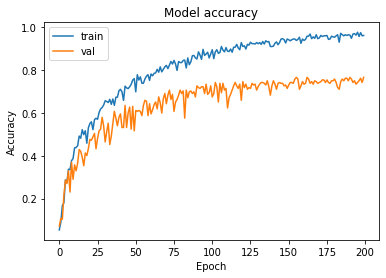

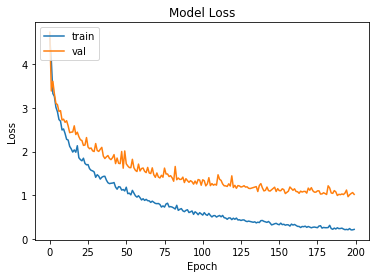

--- Starting trial: run-4
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.15, 'learning_rate': 5e-05}
ffNN took 0.2537569999694824 seconds
Test loss: 0.6275575795001931 - Accuracy: 0.85595567883547


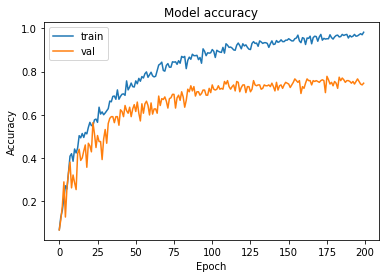

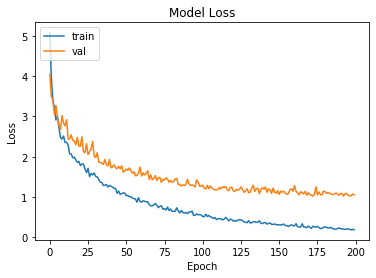

--- Starting trial: run-5
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.2, 'learning_rate': 5e-05}
ffNN took 0.2787501811981201 seconds
Test loss: 0.6209297411329529 - Accuracy: 0.8476454295279907


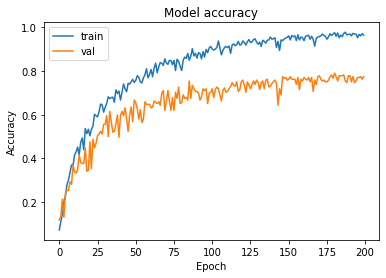

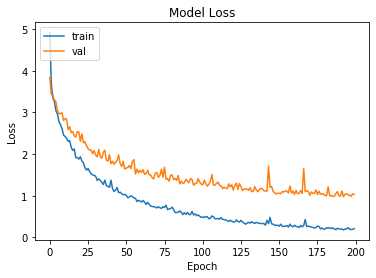

--- Starting trial: run-6
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.15, 'learning_rate': 5e-05}
ffNN took 0.25692033767700195 seconds
Test loss: 0.5851399873762579 - Accuracy: 0.8642659283080589


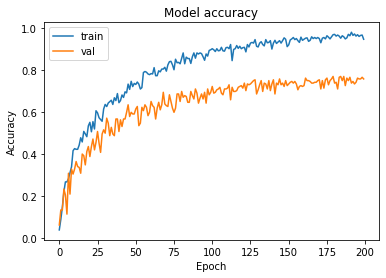

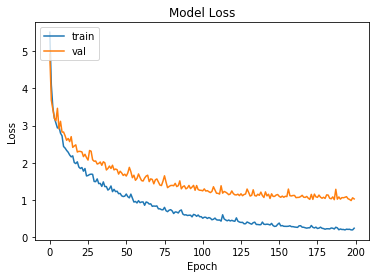

--- Starting trial: run-7
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.2, 'learning_rate': 5e-05}
ffNN took 0.25924229621887207 seconds
Test loss: 0.6541485002166346 - Accuracy: 0.8448753464254977


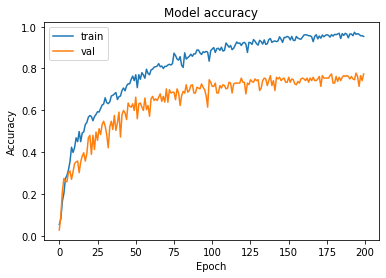

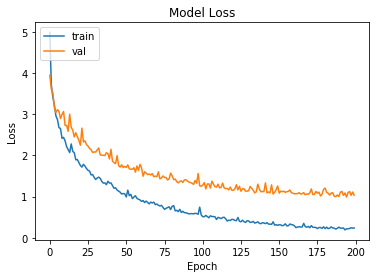

In [ ]:
session_num = 0

for i in range(0, 4):
  for num_units in HP_NUM_UNITS.domain.values:
    for optimizer in HP_OPTIMIZER.domain.values:
      for dropout in HP_DROPOUT.domain.values:
        for learning_rate in HP_LEARNING_RATE.domain.values:
          hparams = {
              HP_NUM_UNITS: num_units,
              HP_OPTIMIZER: optimizer,
              HP_DROPOUT: dropout,
              HP_LEARNING_RATE: learning_rate
          }
          run_name = "run-%d" % session_num
          print('--- Starting trial: %s' % run_name)
          print({h.name: hparams[h] for h in hparams})
          run_first('logs/hparam_tuning/' + run_name, hparams, input_shape=tr_signs[1].shape)
          session_num += 1

In [ ]:
session_num = 0

for i in range(0, 4):
  for num_units in HP_NUM_UNITS.domain.values:
    for optimizer in HP_OPTIMIZER.domain.values:
      for dropout in HP_DROPOUT.domain.values:
        for learning_rate in HP_LEARNING_RATE.domain.values:
          hparams = {
              HP_NUM_UNITS: num_units,
              HP_OPTIMIZER: optimizer,
              HP_DROPOUT: dropout,
              HP_LEARNING_RATE: learning_rate
          }
          run_name = "run-%d" % session_num
          print('--- Starting trial: %s' % run_name)
          print({h.name: hparams[h] for h in hparams})
          run_first('logs/hparam_tuning/' + run_name, hparams, input_shape=tr_signs[1].shape)
          session_num += 1

In [ ]:
model = get_best_model(input_shape=tr_signs[1].shape)
data = train_model(model, 350)

Train on 600 samples, validate on 252 samples
Epoch 1/350


KeyboardInterrupt: ignored

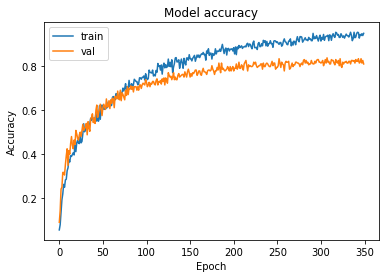

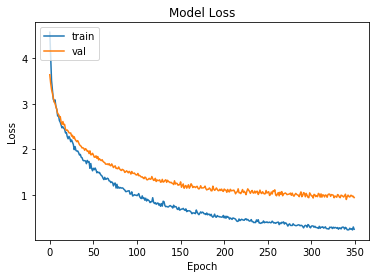

In [ ]:
visualize_accuracy(data)
visualize_loss(data)

## CIFAR 100 Dataset

In [ ]:
from time import time
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import cifar100
(_x_train, _y_train), (_x_test, _y_test) = cifar100.load_data(label_mode='fine')


169009152/169001437 [==============================] - 3s 0us/step


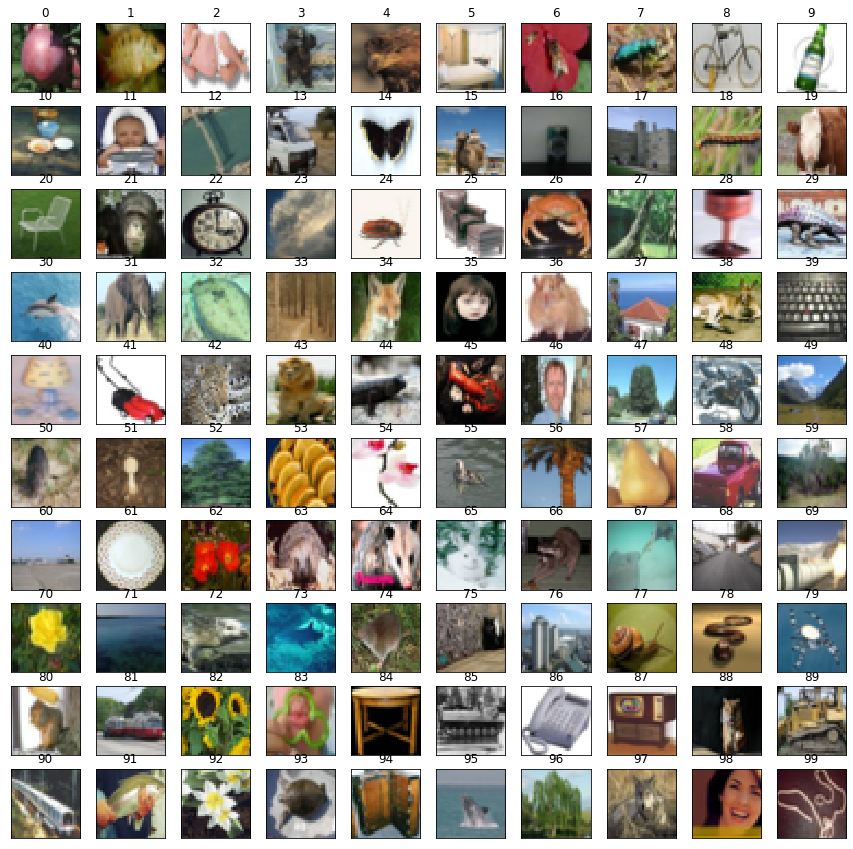

In [ ]:
# Show examples from each class
class_names = np.unique(_y_train)
num_classes = len(class_names)

fig, axes = plt.subplots(10, 10,figsize=(15,15))
for i in range(num_classes):
    ax = axes.flatten()[i]
    indices = np.where(np.isin(_y_train, class_names[i]))[0]
    ax.imshow(_x_train[int(np.random.choice(indices, 1))])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(i)
plt.show()

In [ ]:
# Data pre-processing
x_val = _x_train[40000:]
y_val = _y_train[40000:]
x_train = _x_train[:40000]
y_train = _y_train[:40000]
x_test = _x_test
y_test = _y_test

# Normalize the images to be values in range [0, 1]
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

from keras.utils import np_utils
# Converts a class vector (integers) to binary class matrix
tr_labels = np_utils.to_categorical(y_train, num_classes)
va_labels = np_utils.to_categorical(y_val, num_classes)
te_labels = np_utils.to_categorical(y_test, num_classes)

CIFAR_SIZE = (32, 32)

In [ ]:
def train_second_model(mlp, epochs = 200, verbose = 0):
  data = mlp.fit(x_train, tr_labels, batch_size=256, epochs=epochs, shuffle=True, verbose=verbose, validation_data=(x_val, va_labels))

  start = time()
  loss, acc =  mlp.evaluate(x_test, te_labels, verbose=0)
  end = time()
  print('ffNN took ' + str(end - start) + ' seconds')
  print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

  visualize_accuracy(data)
  visualize_loss(data)

  return data

In [ ]:
def run_second(run_dir, hparams, input_shape):
    hp.hparams(hparams)  # record the values used in this trial
    mlp = get_model(hparams, input_shape=input_shape)
    accuracy = train_second_model(mlp, epochs=150)

--- Starting trial: run-0
{'num_units': 300, 'optimizer': 'adam', 'dropout': 0.1, 'learning_rate': 1e-06}



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








ffNN took 0.8058280944824219 seconds
Test loss: 3.921075269317627 - Accuracy: 0.1214


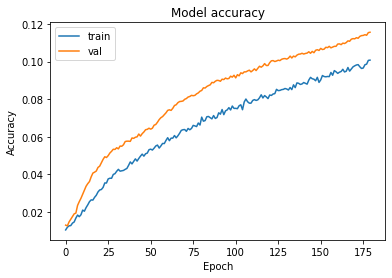

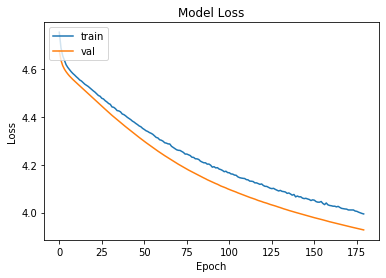

--- Starting trial: run-1
{'num_units': 300, 'optimizer': 'adam', 'dropout': 0.1, 'learning_rate': 1e-05}
ffNN took 1.052499771118164 seconds
Test loss: 3.309724542236328 - Accuracy: 0.2257


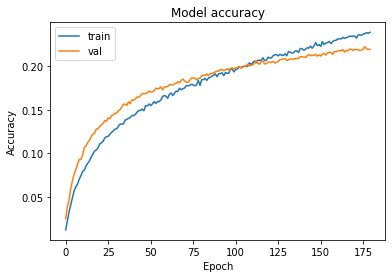

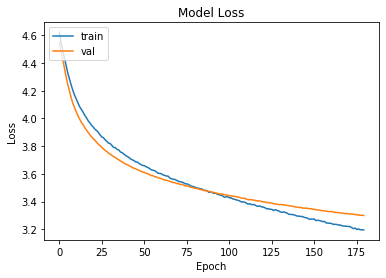

--- Starting trial: run-2
{'num_units': 300, 'optimizer': 'adam', 'dropout': 0.1, 'learning_rate': 5e-05}
ffNN took 0.8974339962005615 seconds
Test loss: 3.0547119106292726 - Accuracy: 0.2808


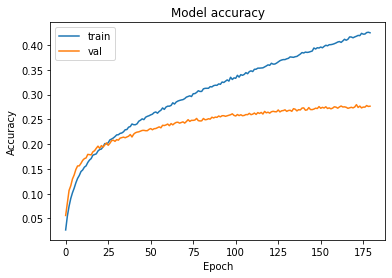

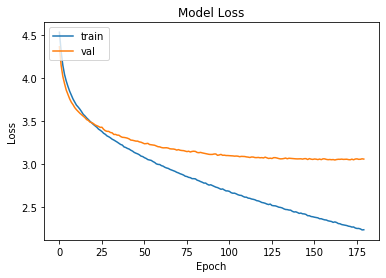

--- Starting trial: run-3
{'num_units': 300, 'optimizer': 'adam', 'dropout': 0.2, 'learning_rate': 1e-06}
ffNN took 1.4785645008087158 seconds
Test loss: 3.9265917739868166 - Accuracy: 0.1153


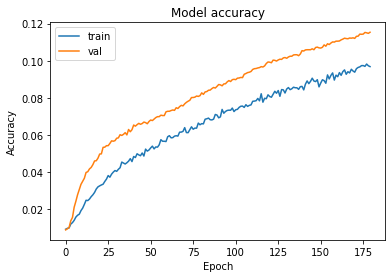

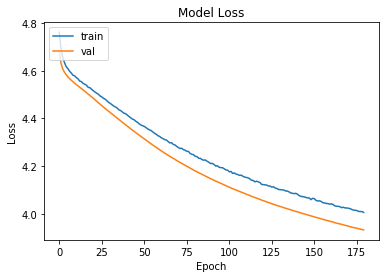

--- Starting trial: run-4
{'num_units': 300, 'optimizer': 'adam', 'dropout': 0.2, 'learning_rate': 1e-05}
ffNN took 0.9874403476715088 seconds
Test loss: 3.313302736663818 - Accuracy: 0.2229


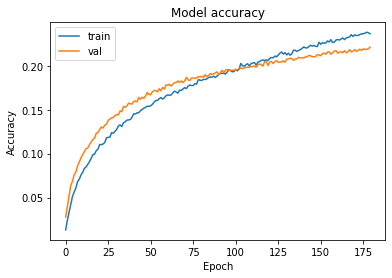

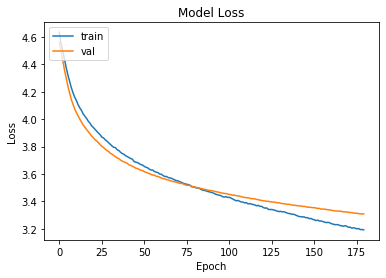

--- Starting trial: run-5
{'num_units': 300, 'optimizer': 'adam', 'dropout': 0.2, 'learning_rate': 5e-05}
ffNN took 0.9235436916351318 seconds
Test loss: 3.041781870269775 - Accuracy: 0.2874


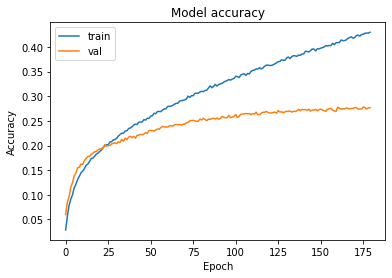

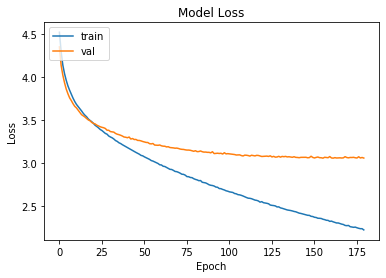

--- Starting trial: run-6
{'num_units': 300, 'optimizer': 'nadam', 'dropout': 0.1, 'learning_rate': 1e-06}
ffNN took 1.0361707210540771 seconds
Test loss: 3.926323631286621 - Accuracy: 0.1181


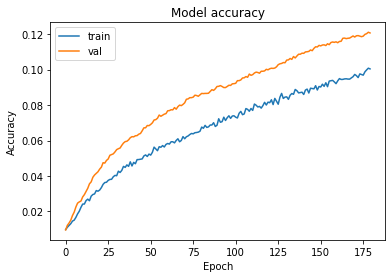

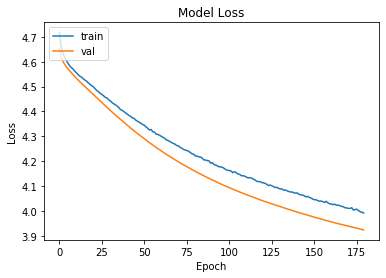

--- Starting trial: run-7
{'num_units': 300, 'optimizer': 'nadam', 'dropout': 0.1, 'learning_rate': 1e-05}
ffNN took 0.9475998878479004 seconds
Test loss: 3.3157668228149415 - Accuracy: 0.2204


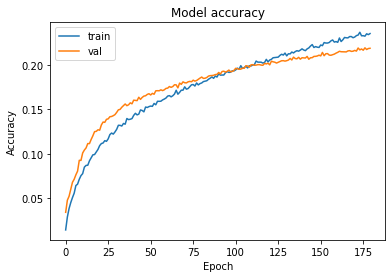

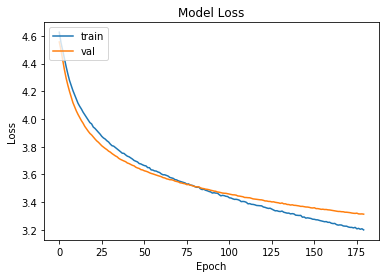

--- Starting trial: run-8
{'num_units': 300, 'optimizer': 'nadam', 'dropout': 0.1, 'learning_rate': 5e-05}


In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for optimizer in HP_OPTIMIZER.domain.values:
    for dropout in HP_DROPOUT.domain.values:
      for learning_rate in HP_LEARNING_RATE.domain.values:
        hparams = {
            HP_NUM_UNITS: num_units,
            HP_OPTIMIZER: optimizer,
            HP_DROPOUT: dropout,
            HP_LEARNING_RATE: learning_rate
        }
        run_name = "run-%d" % session_num
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})
        run_second('logs/hparam_tuning/' + run_name, hparams, input_shape=x_train[1].shape)
        session_num += 1

--- Starting trial: run-0
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.15, 'learning_rate': 5e-05}
ffNN took 0.735877275466919 seconds
Test loss: 3.018918727874756 - Accuracy: 0.2788


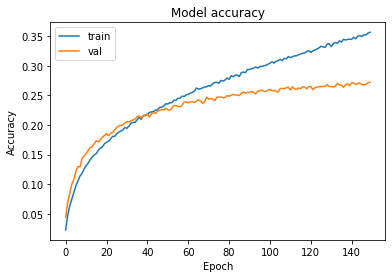

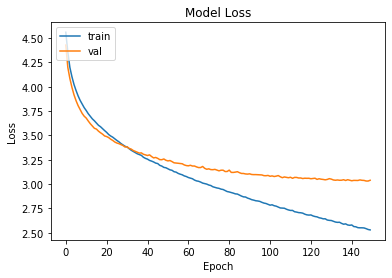

--- Starting trial: run-1
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.15, 'learning_rate': 5e-05}
ffNN took 0.707918643951416 seconds
Test loss: 3.0120706195831297 - Accuracy: 0.2768


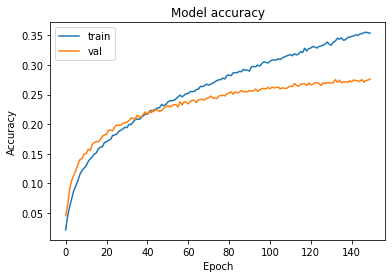

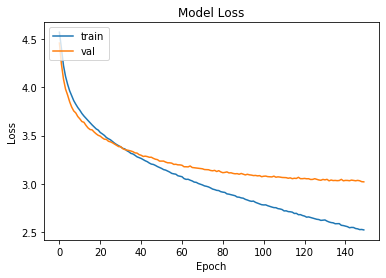

--- Starting trial: run-2
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.15, 'learning_rate': 5e-05}
ffNN took 0.7340879440307617 seconds
Test loss: 3.021474815368652 - Accuracy: 0.2806


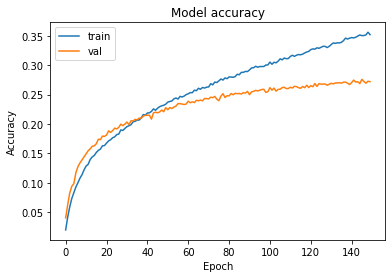

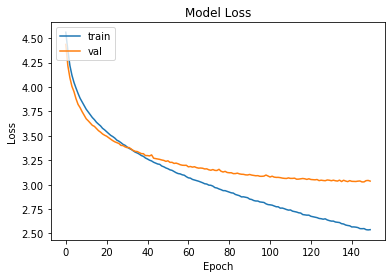

--- Starting trial: run-3
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.15, 'learning_rate': 5e-05}


In [ ]:
session_num = 0

for i in range(5):
  for num_units in HP_NUM_UNITS.domain.values:
    for optimizer in HP_OPTIMIZER.domain.values:
      for dropout in HP_DROPOUT.domain.values:
        for learning_rate in HP_LEARNING_RATE.domain.values:
          hparams = {
              HP_NUM_UNITS: num_units,
              HP_OPTIMIZER: optimizer,
              HP_DROPOUT: dropout,
              HP_LEARNING_RATE: learning_rate
          }
          run_name = "run-%d" % session_num
          print('--- Starting trial: %s' % run_name)
          print({h.name: hparams[h] for h in hparams})
          run_second('logs/hparam_tuning/' + run_name, hparams, input_shape=x_train[1].shape)
          session_num += 1

In [ ]:
hparams = {
            HP_NUM_UNITS: 256,
            HP_OPTIMIZER: "adam",
            HP_DROPOUT: 0.15,
            HP_LEARNING_RATE: 0.001
        }
mlp = get_model(hparams, input_shape=x_train[1].shape)
accuracy = train_second_model(mlp, epochs=250, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/250
 - 20s - loss: 4.2828 - acc: 0.0534 - val_loss: 4.0397 - val_acc: 0.0775
Epoch 2/250
 - 6s - loss: 3.9139 - acc: 0.1003 - val_loss: 3.7569 - val_acc: 0.1235
Epoch 3/250
 - 6s - loss: 3.7488 - acc: 0.1255 - val_loss: 3.7852 - val_acc: 0.1278
Epoch 4/250
 - 6s - loss: 3.6298 - acc: 0.1472 - val_loss: 3.7073 - val_acc: 0.1305
Epoch 5/250
 - 6s - loss: 3.5554 - acc: 0.1615 - val_loss: 3.5506 - val_acc: 0.1613
Epoch 6/250
 - 6s - loss: 3.4767 - acc: 0.1764 - val_loss: 3.5192 - val_acc: 0.1745
Epoch 7/250
 - 6s - loss: 3.4206 - acc: 0.1845 - val_loss: 3.5684 - val_acc: 0.1681
Epoch 8/250
 - 6s - loss: 3.3679 - acc: 0.1932 - val_loss: 3.4855 - val_acc: 0.1762
Epoch 9/250
 - 6s - loss: 3.3044 - acc: 0.2055 - val_loss: 3.5671 - val_acc: 0.1605
Epoch 10/250
 - 6s - loss: 3.2699 - acc: 0.2118 - val_loss: 3.3521 - val_acc: 0.2047
Epoch 11/250
 - 6s - loss: 3.2195 - acc: 0.2170 - val_loss: 3.3896 - val_acc: 0.1957
Epoch 12/250
 - 6s - lo

KeyboardInterrupt: ignored